### Analyzing the fuel data

Loading the csv as a dataframe:

In [1]:
import pandas as pd
df = pd.read_csv('./csvs/008527945276.csv')

In [2]:
df.head()

,id,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,raw_data,new_cordinate_id
0,2.025505e+09,28.710563,77.179337,2018-01-13 07:24:59,NaN,8527945276,0.9,0.0,256,2018-01-13 07:24:55,01000007,A,NaN,NaN
1,2.025505e+09,28.710615,77.179970,2018-01-13 07:10:41,NaN,8527945276,1.1,0.0,6,2018-01-13 07:10:24,01000007,A,NaN,NaN
2,2.025505e+09,28.710595,77.180145,2018-01-13 07:11:14,NaN,8527945276,1.8,87.4,21,2018-01-13 07:10:58,01000007,A,NaN,NaN
3,2.025505e+09,28.710597,77.180138,2018-01-13 07:11:24,NaN,8527945276,1.1,0.0,26,2018-01-13 07:11:22,01000007,A,NaN,NaN
4,2.025505e+09,28.710588,77.180013,2018-01-13 07:12:26,NaN,8527945276,0.9,0.0,50,2018-01-13 07:12:22,01000007,A,NaN,NaN


Helper functions:


In [3]:
def fuel_from_io_state(io_state, fuel_start_index=6, fuel_end_index=8):
    if io_state[1] == '1':
        return int(io_state[fuel_start_index - 1:fuel_end_index], 16)
    else:
        return -1

def read_and_add_deltas(file_name):
    device_data = pd.read_csv(file_name)
    device_data['fuel'] = device_data['io_state'].apply(fuel_from_io_state)
    device_data['distance_diff'] = device_data['distance'].diff()
    device_data['received_date'] = pd.to_datetime(device_data['received_at'])
    device_data.set_index('received_date', inplace=True)
    device_data.reindex()
    device_data.sort_index(inplace=True)
    return device_data


In [4]:
d_data = read_and_add_deltas('./csvs/008527945276.csv')

In [5]:
d_data.head()

,id,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,raw_data,new_cordinate_id,fuel,distance_diff
received_date,,,,,,,,,,,,,,,,
2018-01-13 07:10:24,2.025505e+09,28.710615,77.179970,2018-01-13 07:10:41,NaN,8527945276,1.1,0.0,6,2018-01-13 07:10:24,01000007,A,NaN,NaN,7,-250.0
2018-01-13 07:10:58,2.025505e+09,28.710595,77.180145,2018-01-13 07:11:14,NaN,8527945276,1.8,87.4,21,2018-01-13 07:10:58,01000007,A,NaN,NaN,7,15.0
2018-01-13 07:11:22,2.025505e+09,28.710597,77.180138,2018-01-13 07:11:24,NaN,8527945276,1.1,0.0,26,2018-01-13 07:11:22,01000007,A,NaN,NaN,7,5.0
2018-01-13 07:12:22,2.025505e+09,28.710588,77.180013,2018-01-13 07:12:26,NaN,8527945276,0.9,0.0,50,2018-01-13 07:12:22,01000007,A,NaN,NaN,7,24.0
2018-01-13 07:13:22,2.025505e+09,28.710562,77.180140,2018-01-13 07:13:26,NaN,8527945276,1.1,0.0,70,2018-01-13 07:13:22,01000007,A,NaN,NaN,7,20.0


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
d_data.describe()

/home/piyush/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,lat,long,updated_at,device_id,speed,orientation,distance,raw_data,new_cordinate_id,fuel,distance_diff
count,1.474000e+04,67848.000000,67848.000000,0.0,6.784800e+04,67848.000000,67848.000000,6.784800e+04,0.0,5.310800e+04,67848.000000,67847.000000
mean,2.118573e+09,25.700896,81.195784,NaN,8.527945e+09,9.100312,46.088113,2.456494e+06,NaN,2.255783e+09,94.841027,77.216443
std,1.749940e+07,1.917497,3.963588,NaN,0.000000e+00,17.076101,91.752710,1.621015e+06,NaN,6.370789e+07,171.824029,14342.764120
min,2.025505e+09,20.163948,74.846973,NaN,8.527945e+09,0.000000,0.000000,0.000000e+00,NaN,2.147498e+09,-1.000000,-191312.000000
25%,NaN,25.248470,77.727443,NaN,8.527945e+09,0.000000,0.000000,9.775350e+05,NaN,NaN,-1.000000,NaN
50%,NaN,26.556853,80.942253,NaN,8.527945e+09,0.000000,0.000000,2.428795e+06,NaN,NaN,-1.000000,NaN
75%,NaN,26.785690,85.358423,NaN,8.527945e+09,6.450000,32.780000,4.029578e+06,NaN,NaN,102.000000,NaN
max,2.147482e+09,28.710867,86.737023,NaN,8.527945e+09,69.400000,360.000000,5.239160e+06,NaN,2.369778e+09,599.000000,191420.000000


In [8]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67848 entries, 2018-01-13 07:10:24 to 2018-02-15 11:50:23
Data columns (total 16 columns):
id                  14740 non-null float64
lat                 67848 non-null float64
long                67848 non-null float64
created_at          67848 non-null object
updated_at          0 non-null float64
device_id           67848 non-null int64
speed               67848 non-null float64
orientation         67848 non-null float64
distance            67848 non-null int64
received_at         67848 non-null object
io_state            67848 non-null object
availability        67848 non-null object
raw_data            0 non-null float64
new_cordinate_id    53108 non-null float64
fuel                67848 non-null int64
distance_diff       67847 non-null float64
dtypes: float64(9), int64(3), object(4)
memory usage: 8.8+ MB


Dropping the null and irrelevant columns.

In [9]:
relevant_data = d_data.loc[:,['id', 'speed', 'orientation', 'distance', 'fuel', 'distance_diff']]

In [10]:
relevant_data.head()

,id,speed,orientation,distance,fuel,distance_diff
received_date,,,,,,
2018-01-13 07:10:24,2.025505e+09,1.1,0.0,6,7,-250.0
2018-01-13 07:10:58,2.025505e+09,1.8,87.4,21,7,15.0
2018-01-13 07:11:22,2.025505e+09,1.1,0.0,26,7,5.0
2018-01-13 07:12:22,2.025505e+09,0.9,0.0,50,7,24.0
2018-01-13 07:13:22,2.025505e+09,1.1,0.0,70,7,20.0


In [11]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67848 entries, 2018-01-13 07:10:24 to 2018-02-15 11:50:23
Data columns (total 6 columns):
id               14740 non-null float64
speed            67848 non-null float64
orientation      67848 non-null float64
distance         67848 non-null int64
fuel             67848 non-null int64
distance_diff    67847 non-null float64
dtypes: float64(4), int64(2)
memory usage: 3.6 MB


In [12]:
relevant_data.describe()

/home/piyush/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,speed,orientation,distance,fuel,distance_diff
count,1.474000e+04,67848.000000,67848.000000,6.784800e+04,67848.000000,67847.000000
mean,2.118573e+09,9.100312,46.088113,2.456494e+06,94.841027,77.216443
std,1.749940e+07,17.076101,91.752710,1.621015e+06,171.824029,14342.764120
min,2.025505e+09,0.000000,0.000000,0.000000e+00,-1.000000,-191312.000000
25%,NaN,0.000000,0.000000,9.775350e+05,-1.000000,NaN
50%,NaN,0.000000,0.000000,2.428795e+06,-1.000000,NaN
75%,NaN,6.450000,32.780000,4.029578e+06,102.000000,NaN
max,2.147482e+09,69.400000,360.000000,5.239160e+06,599.000000,191420.000000


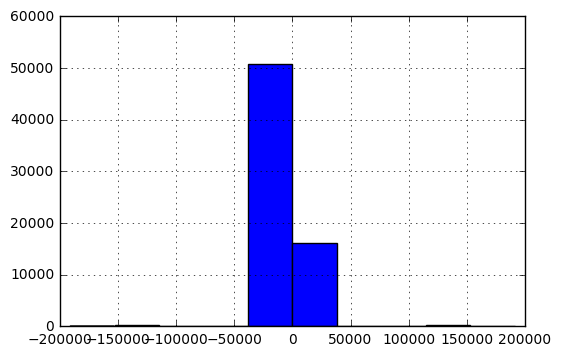

In [13]:
relevant_data['distance_diff'].hist()

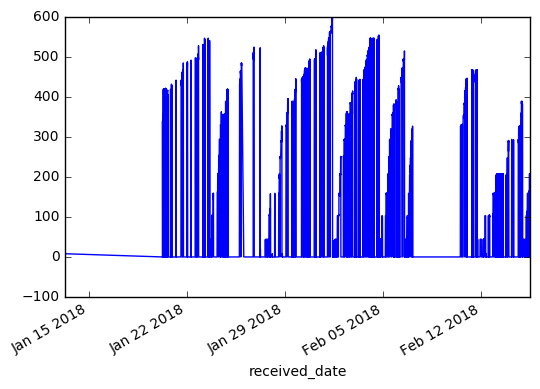

In [14]:
relevant_data['fuel'].plot()

Looking at the data where the fuel levels are less than equal to zero

In [15]:
condition = relevant_data['fuel'] <= 0
lowfuel_data = relevant_data[condition]

In [16]:
lowfuel_data.head()

,id,speed,orientation,distance,fuel,distance_diff
received_date,,,,,,
2018-01-20 05:31:58,2.090984e+09,0.0,0.0,0,-1,-499.0
2018-01-20 05:32:42,2.090988e+09,0.1,0.0,0,-1,0.0
2018-01-20 05:37:14,2.091022e+09,0.0,0.0,1,-1,1.0
2018-01-20 05:37:45,2.091026e+09,0.0,0.0,1,-1,0.0
2018-01-20 05:38:14,2.091029e+09,0.0,0.0,1,-1,0.0


In [17]:
lowfuel_data.describe()

/home/piyush/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,speed,orientation,distance,fuel,distance_diff
count,1.118100e+04,47258.000000,47258.000000,4.725800e+04,47258.0,47258.000000
mean,2.117639e+09,0.001361,0.087134,2.412794e+06,-1.0,-168.084769
std,1.634545e+07,0.145397,4.992688,1.676113e+06,0.0,13876.301028
min,2.090984e+09,0.000000,0.000000,0.000000e+00,-1.0,-189633.000000
25%,NaN,0.000000,0.000000,9.377630e+05,-1.0,0.000000
50%,NaN,0.000000,0.000000,2.246898e+06,-1.0,0.000000
75%,NaN,0.000000,0.000000,4.029578e+06,-1.0,0.000000
max,2.146868e+09,19.800000,359.830000,5.239160e+06,-1.0,135053.000000


One interesting obersvation is that most of the data points(47258 out of 67848) in our data frame belong to the case of fuel level less than equal to zero.

Looking at the data where the fuel levels are greater than 0

In [18]:
condition = relevant_data['fuel'] > 0
highfuel_data = relevant_data[condition]

In [19]:
highfuel_data.head()

,id,speed,orientation,distance,fuel,distance_diff
received_date,,,,,,
2018-01-13 07:10:24,2.025505e+09,1.1,0.0,6,7,-250.0
2018-01-13 07:10:58,2.025505e+09,1.8,87.4,21,7,15.0
2018-01-13 07:11:22,2.025505e+09,1.1,0.0,26,7,5.0
2018-01-13 07:12:22,2.025505e+09,0.9,0.0,50,7,24.0
2018-01-13 07:13:22,2.025505e+09,1.1,0.0,70,7,20.0


In [20]:
highfuel_data.describe()

/home/piyush/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,speed,orientation,distance,fuel,distance_diff
count,3.559000e+03,20590.000000,20590.000000,2.059000e+04,20590.000000,20589.000000
mean,2.121506e+09,29.984153,151.669185,2.556793e+06,314.814570,640.257128
std,2.043757e+07,18.293534,108.071837,1.482027e+06,166.777256,15345.487238
min,2.025505e+09,0.000000,0.000000,0.000000e+00,3.000000,-191312.000000
25%,NaN,15.000000,64.277500,1.321525e+06,158.000000,NaN
50%,NaN,33.100000,132.905000,2.572180e+06,352.000000,NaN
75%,NaN,45.300000,251.800000,3.801237e+06,460.000000,NaN
max,2.147482e+09,69.400000,360.000000,5.239156e+06,599.000000,191420.000000


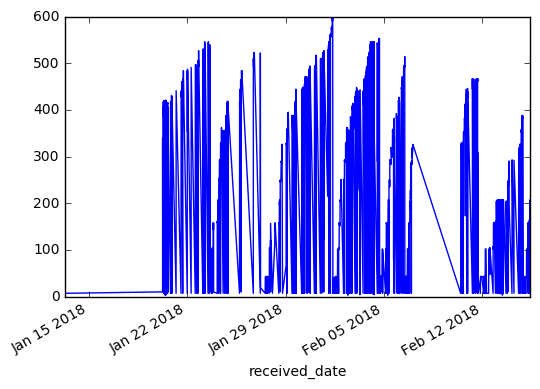

In [21]:
highfuel_data['fuel'].plot()

In [22]:
highfuel_data['std_fuel'] = highfuel_data['fuel'].apply(lambda x: (x - highfuel_data['fuel'].mean())/highfuel_data['fuel'].std())

/home/piyush/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
highfuel_data.head()

,id,speed,orientation,distance,fuel,distance_diff,std_fuel
received_date,,,,,,,
2018-01-13 07:10:24,2.025505e+09,1.1,0.0,6,7,-250.0,-1.845663
2018-01-13 07:10:58,2.025505e+09,1.8,87.4,21,7,15.0,-1.845663
2018-01-13 07:11:22,2.025505e+09,1.1,0.0,26,7,5.0,-1.845663
2018-01-13 07:12:22,2.025505e+09,0.9,0.0,50,7,24.0,-1.845663
2018-01-13 07:13:22,2.025505e+09,1.1,0.0,70,7,20.0,-1.845663


In [24]:
highfuel_data.describe()

/home/piyush/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,speed,orientation,distance,fuel,distance_diff,std_fuel
count,3.559000e+03,20590.000000,20590.000000,2.059000e+04,20590.000000,20589.000000,2.059000e+04
mean,2.121506e+09,29.984153,151.669185,2.556793e+06,314.814570,640.257128,6.560075e-16
std,2.043757e+07,18.293534,108.071837,1.482027e+06,166.777256,15345.487238,1.000000e+00
min,2.025505e+09,0.000000,0.000000,0.000000e+00,3.000000,-191312.000000,-1.869647e+00
25%,NaN,15.000000,64.277500,1.321525e+06,158.000000,NaN,-9.402635e-01
50%,NaN,33.100000,132.905000,2.572180e+06,352.000000,NaN,2.229646e-01
75%,NaN,45.300000,251.800000,3.801237e+06,460.000000,NaN,8.705349e-01
max,2.147482e+09,69.400000,360.000000,5.239156e+06,599.000000,191420.000000,1.703982e+00


Considering only those data points which have finite values of distance_diff

In [25]:
import numpy as np
highfuel_data = highfuel_data[np.isfinite(highfuel_data['distance_diff'])]

In [26]:
highfuel_data.describe()

/home/piyush/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,speed,orientation,distance,fuel,distance_diff,std_fuel
count,3.558000e+03,20589.000000,20589.000000,2.058900e+04,20589.000000,20589.000000,20589.000000
mean,2.121533e+09,29.985565,151.676551,2.556917e+06,314.829521,640.257128,0.000090
std,2.037695e+07,18.292856,108.069292,1.481955e+06,166.767508,15345.487238,0.999942
min,2.025505e+09,0.000000,0.000000,0.000000e+00,3.000000,-191312.000000,-1.869647
25%,NaN,15.000000,64.300000,1.321525e+06,158.000000,84.000000,-0.940264
50%,NaN,33.100000,132.910000,2.572180e+06,352.000000,268.000000,0.222965
75%,NaN,45.300000,251.810000,3.801237e+06,460.000000,390.000000,0.870535
max,2.147482e+09,69.400000,360.000000,5.239156e+06,599.000000,191420.000000,1.703982


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f650b2d3e48>]], dtype=object)

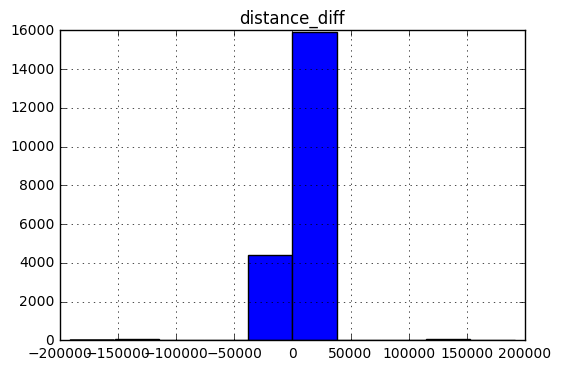

In [27]:
highfuel_data.hist('distance_diff')

/home/piyush/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


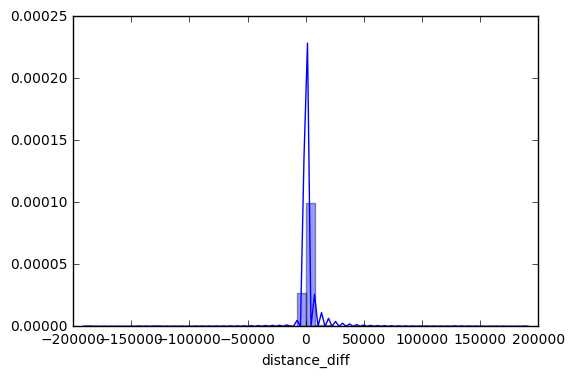

In [28]:
import seaborn as sns
sns.distplot(highfuel_data['distance_diff'])

There seems to be a lot of negative values in distance_diff, which I assume is the noise or faulty data


In [29]:
condition = highfuel_data['distance_diff'] >= 0
new_highfuel_data = highfuel_data[condition]

In [30]:
new_highfuel_data.describe()

/home/piyush/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,speed,orientation,distance,fuel,distance_diff,std_fuel
count,3.466000e+03,19653.000000,19653.000000,1.965300e+04,19653.000000,19653.000000,19653.000000
mean,2.121269e+09,29.987941,151.415999,2.568044e+06,314.785529,1559.970335,-0.000174
std,2.031979e+07,18.312027,108.077784,1.493387e+06,166.661605,11896.758092,0.999307
min,2.025505e+09,0.000000,0.000000,0.000000e+00,3.000000,0.000000,-1.869647
25%,NaN,15.000000,64.110000,1.316165e+06,158.000000,115.000000,-0.940264
50%,NaN,33.300000,132.670000,2.577230e+06,352.000000,281.000000,0.222965
75%,NaN,45.300000,251.570000,3.833039e+06,460.000000,392.000000,0.870535
max,2.147482e+09,69.400000,360.000000,5.239150e+06,599.000000,191420.000000,1.703982


Still we can see the standard deviation to be quite high, as the some data have really high values of distance diff.

Removing those higher outliers in the distance_diff column

In [31]:
condition = new_highfuel_data['distance_diff'] < (392 + 1.5*(392-115))

In [32]:
ndf = new_highfuel_data[condition]

In [33]:
ndf.describe()

/home/piyush/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,speed,orientation,distance,fuel,distance_diff,std_fuel
count,3.355000e+03,18210.000000,18210.000000,1.821000e+04,18210.000000,18210.000000,18210.000000
mean,2.120902e+09,29.432059,150.662069,2.580593e+06,313.252718,251.099341,-0.009365
std,2.038507e+07,18.346219,108.269595,1.512044e+06,167.099047,178.877363,1.001929
min,2.025505e+09,0.000000,0.000000,0.000000e+00,3.000000,0.000000,-1.869647
25%,NaN,14.000000,63.380000,1.278680e+06,158.000000,100.000000,-0.940264
50%,NaN,32.500000,132.560000,2.584615e+06,352.000000,260.000000,0.222965
75%,NaN,44.800000,250.660000,3.920063e+06,459.000000,370.000000,0.864539
max,2.147482e+09,69.400000,360.000000,5.239150e+06,599.000000,807.000000,1.703982


Now the valued for distance_diff look much better with a digestable standard deviation.

/home/piyush/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


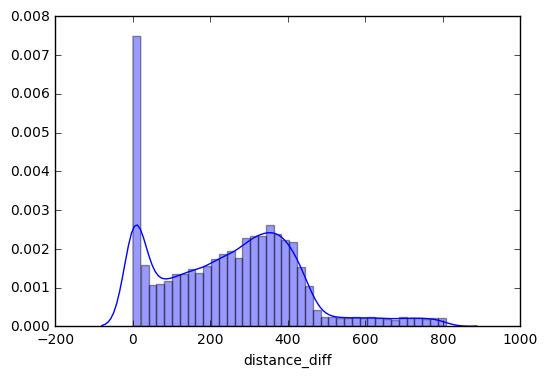

In [34]:
sns.distplot(ndf['distance_diff'])

Having removed the outliers using the distance_diff feature, let's plot the fuel time series data 

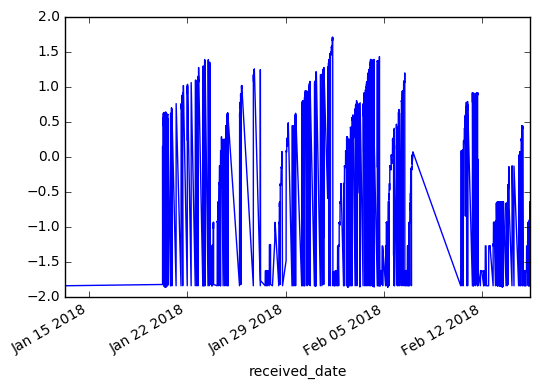

In [35]:
ndf['std_fuel'].plot()

/home/piyush/anaconda/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


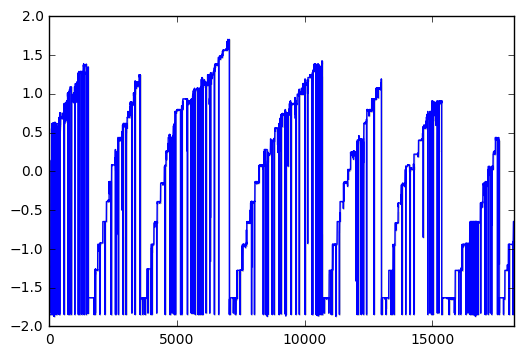

In [36]:
sns.tsplot(ndf['std_fuel'])

Let us see the distribution of the fuel data

/home/piyush/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


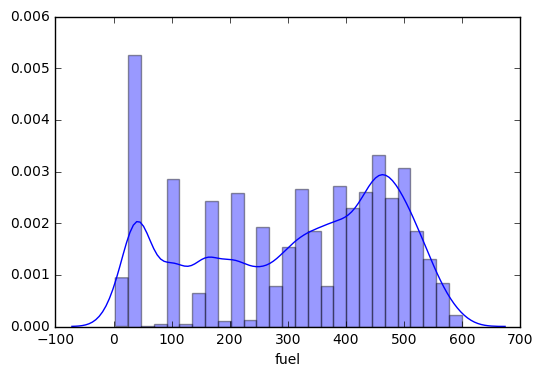

In [37]:
sns.distplot(ndf['fuel'])

Calculating the fuel_diff as the difference in the fuel level between two points, I think the distance_diff and the fuel_diff should have some sort of linear correlation as with increasing distance fuel usage shoul also increase and hence the value of fuel_diff.

In [38]:
ndf['fuel_diff'] = ndf['fuel'].diff()

/home/piyush/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
ndf.head()

,id,speed,orientation,distance,fuel,distance_diff,std_fuel,fuel_diff
received_date,,,,,,,,
2018-01-13 07:10:58,2.025505e+09,1.8,87.4,21,7,15.0,-1.845663,NaN
2018-01-13 07:11:22,2.025505e+09,1.1,0.0,26,7,5.0,-1.845663,0.0
2018-01-13 07:12:22,2.025505e+09,0.9,0.0,50,7,24.0,-1.845663,0.0
2018-01-13 07:13:22,2.025505e+09,1.1,0.0,70,7,20.0,-1.845663,0.0
2018-01-13 07:13:52,2.025505e+09,0.5,0.0,72,7,2.0,-1.845663,0.0


From the above table we can see that with increasing distance the fuel level does not change (in the first five entries), let's look at the first 15 entries in the dataset.

In [42]:
ndf.head(15)

,id,speed,orientation,distance,fuel,distance_diff,std_fuel,fuel_diff
received_date,,,,,,,,
2018-01-13 07:10:58,2.025505e+09,1.8,87.4,21,7,15.0,-1.845663,0.0
2018-01-13 07:11:22,2.025505e+09,1.1,0.0,26,7,5.0,-1.845663,0.0
2018-01-13 07:12:22,2.025505e+09,0.9,0.0,50,7,24.0,-1.845663,0.0
2018-01-13 07:13:22,2.025505e+09,1.1,0.0,70,7,20.0,-1.845663,0.0
2018-01-13 07:13:52,2.025505e+09,0.5,0.0,72,7,2.0,-1.845663,0.0
2018-01-13 07:14:23,2.025505e+09,0.7,0.0,75,7,3.0,-1.845663,0.0
2018-01-13 07:15:23,2.025505e+09,0.5,0.0,75,7,0.0,-1.845663,0.0
2018-01-13 07:16:23,2.025505e+09,0.9,0.0,83,7,8.0,-1.845663,0.0
2018-01-13 07:16:53,2.025505e+09,1.6,0.0,99,7,16.0,-1.845663,0.0


Again we see that the fuel level do not change, this could indicate the following:
1. The fuel data is wrong
2. The fuel indicator is not very sensitive as compared to the distance metric.

Let's visualize the fuel distribution once again.

/home/piyush/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


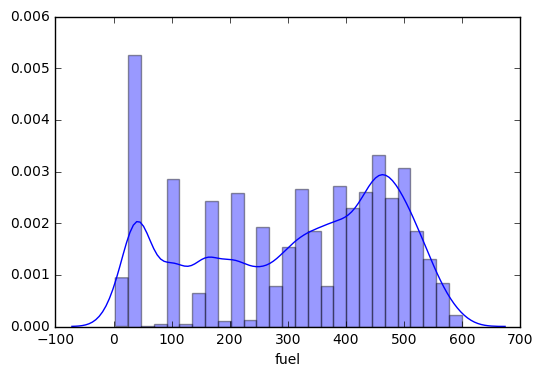

In [43]:
sns.distplot(ndf['fuel'])

We can see a large number of values in the region 0 to 50, the important question here is that are these values anamolies or are they correct? We don't have enough evidence to rule them as anamoly as of now hence we'll continue to have them in the data.

In [44]:
ndf['fuel_diff'][0]

0.0

In [45]:
ndf['fuel_diff'][0] = 0

/home/piyush/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/piyush/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
ndf.head()

,id,speed,orientation,distance,fuel,distance_diff,std_fuel,fuel_diff
received_date,,,,,,,,
2018-01-13 07:10:58,2.025505e+09,1.8,87.4,21,7,15.0,-1.845663,0.0
2018-01-13 07:11:22,2.025505e+09,1.1,0.0,26,7,5.0,-1.845663,0.0
2018-01-13 07:12:22,2.025505e+09,0.9,0.0,50,7,24.0,-1.845663,0.0
2018-01-13 07:13:22,2.025505e+09,1.1,0.0,70,7,20.0,-1.845663,0.0
2018-01-13 07:13:52,2.025505e+09,0.5,0.0,72,7,2.0,-1.845663,0.0


In [47]:
ndf.describe()

/home/piyush/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,speed,orientation,distance,fuel,distance_diff,std_fuel,fuel_diff
count,3.355000e+03,18210.000000,18210.000000,1.821000e+04,18210.000000,18210.000000,18210.000000,18210.000000
mean,2.120902e+09,29.432059,150.662069,2.580593e+06,313.252718,251.099341,-0.009365,0.010983
std,2.038507e+07,18.346219,108.269595,1.512044e+06,167.099047,178.877363,1.001929,56.986914
min,2.025505e+09,0.000000,0.000000,0.000000e+00,3.000000,0.000000,-1.869647,-592.000000
25%,NaN,14.000000,63.380000,1.278680e+06,158.000000,100.000000,-0.940264,0.000000
50%,NaN,32.500000,132.560000,2.584615e+06,352.000000,260.000000,0.222965,0.000000
75%,NaN,44.800000,250.660000,3.920063e+06,459.000000,370.000000,0.864539,0.000000
max,2.147482e+09,69.400000,360.000000,5.239150e+06,599.000000,807.000000,1.703982,543.000000


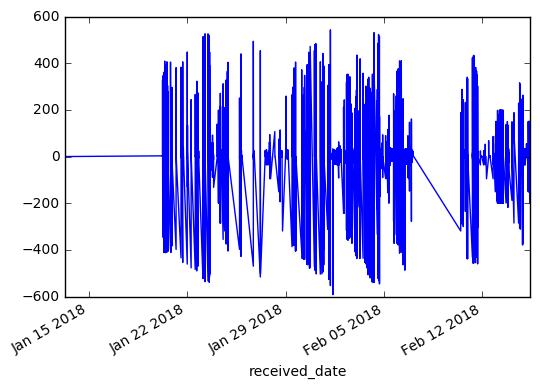

In [48]:
ndf['fuel_diff'].plot()

Now let's see how the fuel levels vary with distance:

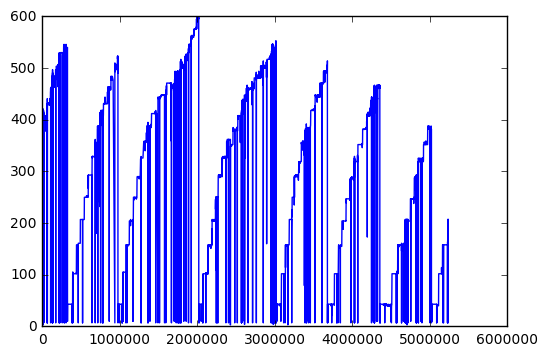

In [49]:
plt.plot( ndf['distance'],ndf['fuel'])

The plot above shows that the fuel level increase with distance followed by sudden drops, the sudden drop could indicate the fuel refilling operation and the higher fuel values could mean lower fuel levels.

The distance_diff and fuel_diff could show some correlation as the fuel consumption is a function of distance travelled, let's see if there is a relationship between the two:

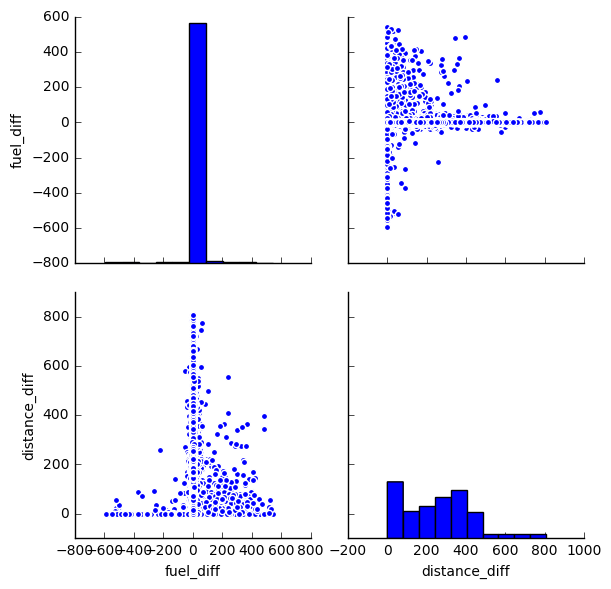

In [50]:
cols = ['fuel_diff', 'distance_diff']
sns.pairplot(ndf[cols], size=3)
plt.show()

The correlation between the two is not quite visible here which could be due to the fact that the fuel refilling changes the the fuel levels drastically and this could disrupt the relationship between the two.

### Time series analysis using Prophet  
Facebook's Prophet package is a useful tool to analyze time series data.

Removing the time stamp from index and adding it as a column:

In [51]:
ndf.reset_index(level=0, inplace=True)
ndf.head()

,received_date,id,speed,orientation,distance,fuel,distance_diff,std_fuel,fuel_diff
0,2018-01-13 07:10:58,2.025505e+09,1.8,87.4,21,7,15.0,-1.845663,0.0
1,2018-01-13 07:11:22,2.025505e+09,1.1,0.0,26,7,5.0,-1.845663,0.0
2,2018-01-13 07:12:22,2.025505e+09,0.9,0.0,50,7,24.0,-1.845663,0.0
3,2018-01-13 07:13:22,2.025505e+09,1.1,0.0,70,7,20.0,-1.845663,0.0
4,2018-01-13 07:13:52,2.025505e+09,0.5,0.0,72,7,2.0,-1.845663,0.0
